In [24]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras as keras
import pandas as pd

In [13]:
CSV_COLUMN_NAMES = ['SepalLength','SepalWidth','PetalWidth','PetalLength','Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

<module 'tensorflow._api.v2.version' from 'C:\\Users\\IlkerErkek\\anaconda3\\envs\\tensorflow\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

In [128]:
test = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv",names = CSV_COLUMN_NAMES,header=0)
train = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv",names = CSV_COLUMN_NAMES,header=0)

In [129]:
train.head()

,SepalLength,SepalWidth,PetalWidth,PetalLength,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


<AxesSubplot:>

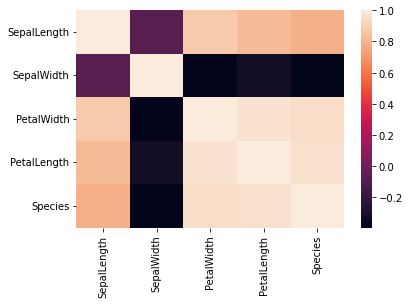

In [130]:
sns.heatmap(train.corr())

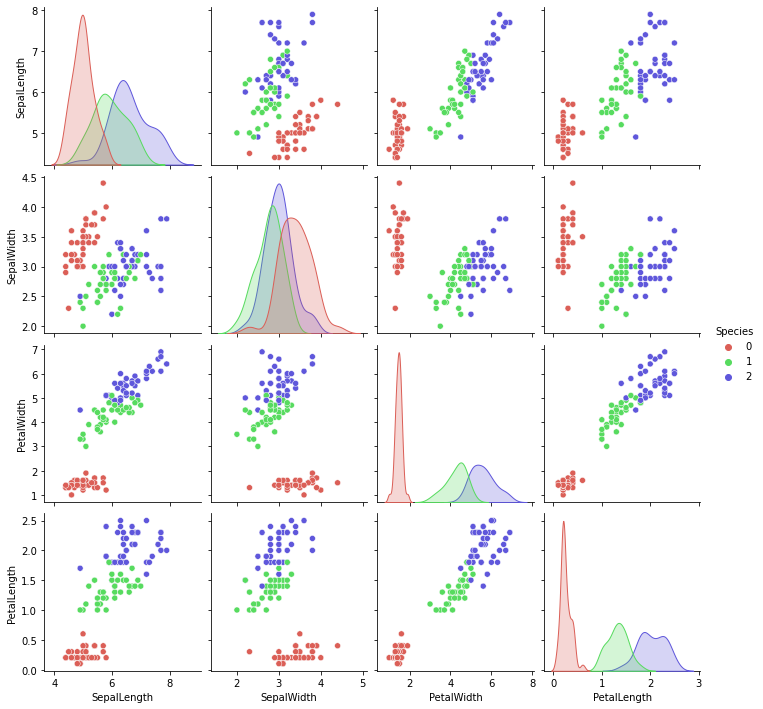

In [131]:
sns.pairplot(train, hue = 'Species',palette=sns.color_palette("hls",3));

In [139]:
train_y = train.pop('Species')
test_y = test.pop('Species')

KeyError: 'Species'

In [138]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [140]:
feature_columns = []
for key in train.keys():
    feature_columns.append(tf.feature_column.numeric_column(key=key))
feature_columns

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [141]:
classifier = tf.estimator.DNNClassifier(
    feature_columns= feature_columns,
    hidden_units=[30,10],
    n_classes=3
)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ILKERE~1\\AppData\\Local\\Temp\\tmpy_b96g27', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [142]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ILKERE~1\AppData\Local\Temp\tmpy_b96g27\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.2386355, step = 0
INFO:tensorflow:global_step/sec: 396.312
INFO:tensorflow:loss = 0.90421474, step = 100 (0.253 sec)
INFO:tensorflow:global_step/sec: 560.153
INFO:tensorflow:loss = 0.7998084, step = 200 (0.178 sec)
INFO:tensorflow:global_step/sec: 569.702
INFO:tensorflow:loss = 0.73291636, step = 300 (0.176 sec)
INFO:tensorflow:global_step/sec: 563.294
INFO:tensorflow:loss = 0.6842582, step = 400 (0.178 sec)
INFO:tensorflow:global_step/sec: 553.962
INFO:tensorflow:loss = 0.6433

In [144]:
result = classifier.evaluate(input_fn= lambda: input_fn(test,test_y,training=False))
result

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-12-14T00:20:33
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ILKERE~1\AppData\Local\Temp\tmpy_b96g27\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.31017s
INFO:tensorflow:Finished evaluation at 2021-12-14-00:20:34
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.96666664, average_loss = 0.3482006, global_step = 5000, loss = 0.3482006
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\ILKERE~1\AppData\Local\Temp\tmpy_b96g27\model.ckpt-5000


{'accuracy': 0.96666664,
 'average_loss': 0.3482006,
 'loss': 0.3482006,
 'global_step': 5000}